we need to predict, is the customer is going to leave or not 
and for that we will use python , we have train and test data 
let's start 

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('train.csv')

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [92]:
#rows 5282 and columns are 21 so be careful
df.shape

(5282, 21)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [94]:
#let's check is our data set is balance or not 

df['Churn'].value_counts(normalize=True) * 100


0    73.457024
1    26.542976
Name: Churn, dtype: float64

In [95]:
# List of columns with data type 'object'
object_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in object_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("----------------------")


Value counts for gender:
Male      2657
Female    2625
Name: gender, dtype: int64
----------------------
Value counts for Partner:
No     2749
Yes    2533
Name: Partner, dtype: int64
----------------------
Value counts for Dependents:
No     3713
Yes    1569
Name: Dependents, dtype: int64
----------------------
Value counts for PhoneService:
Yes    4752
No      530
Name: PhoneService, dtype: int64
----------------------
Value counts for MultipleLines:
No                  2519
Yes                 2233
No phone service     530
Name: MultipleLines, dtype: int64
----------------------
Value counts for InternetService:
Fiber optic    2323
DSL            1816
No             1143
Name: InternetService, dtype: int64
----------------------
Value counts for OnlineSecurity:
No                     2618
Yes                    1521
No internet service    1143
Name: OnlineSecurity, dtype: int64
----------------------
Value counts for OnlineBackup:
No                     2300
Yes                    18

In [96]:
df['SeniorCitizen'].value_counts()

0    4426
1     856
Name: SeniorCitizen, dtype: int64

In [97]:
df['tenure'].unique()

array([72,  4, 56,  9, 60, 59,  1, 66, 30, 25, 12, 15, 51, 35, 19, 48,  6,
       37, 63, 67, 44,  3, 22,  2, 34, 32, 33, 11, 71, 53, 18, 54, 43, 23,
       40, 42, 31, 52, 65, 69,  8, 47, 58, 26,  5, 68,  7, 20, 46, 41, 16,
       10, 14, 64, 45, 24, 39, 50, 57, 38, 17, 13, 61, 29, 36, 55, 70, 21,
       49, 27, 62,  0, 28], dtype=int64)

In [98]:
df['tenure'].describe()

count    5282.000000
mean       32.362931
std        24.627623
min         0.000000
25%         9.000000
50%        29.000000
75%        55.750000
max        72.000000
Name: tenure, dtype: float64

In [99]:
df['tenure'].value_counts()

1     462
72    279
2     179
3     145
4     137
     ... 
55     42
44     41
28     37
36     34
0       8
Name: tenure, Length: 73, dtype: int64

In [100]:
df['MonthlyCharges'].unique()

array([ 53.65,  46.  ,  21.2 , ..., 102.  , 114.55,  56.8 ])

In [101]:
df['MonthlyCharges'].value_counts()

20.05     46
19.65     36
20.15     35
20.00     34
19.95     34
          ..
33.15      1
43.45      1
33.55      1
116.45     1
56.80      1
Name: MonthlyCharges, Length: 1471, dtype: int64

In [102]:
df['MonthlyCharges'].describe()

count    5282.000000
mean       64.856626
std        30.171934
min        18.400000
25%        35.450000
50%        70.500000
75%        89.987500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [103]:
df['TotalCharges'].describe()

count     5282
unique    4959
top       20.2
freq         9
Name: TotalCharges, dtype: object

In [104]:
df['TotalCharges'].unique()

array(['3784', '193.6', '1238.65', ..., '7707.7', '482.8', '109.3'],
      dtype=object)

In [105]:
df['Churn'].value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

<Axes: xlabel='MonthlyCharges'>

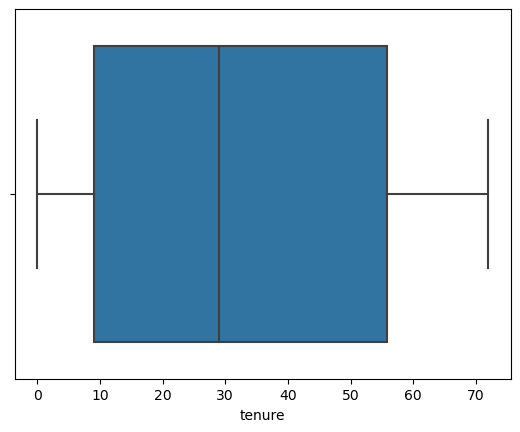

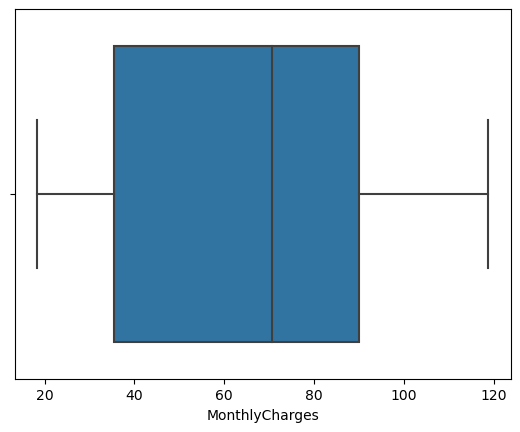

In [106]:
#we will check the outliers

plt.figure()
sns.boxplot(x='tenure',data=df)

plt.figure()
sns.boxplot(x='MonthlyCharges',data=df)



In [107]:
print(sorted(df['TotalCharges'].unique()))


[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.45', '101.65', '101.9', '1010', '1011.5', '1011.8', '1012.4', '1013.05', '1013.35', '1013.6', '1014.25', '102.5', '102.75', '1020.75', '1021.55', '1021.8', '1022.5', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.9', '1029.75', '1029.8', '1031.1', '1031.4', '1031.7', '1032', '1033', '1033.9', '1035.5', '1035.7', '1036', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1043.35', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1049.05', '105.5', '1051.05', '1052.35', '1054.6', '1054.75', '1054.8', '1055.9', '1056.95', '1057.55', '1057.85', '1058.1', '1058.25', '1058.6', '1059.55', '106.2', '106.55', '106.8', '106.85', '1060.2', '1061.6', '1062.1', '1064.65', '1066.15', '1066.9', '1067.05',

In [108]:
# we have problem in this column that's why we can not change the type of the column,  
# Step 1: Replace spaces with NaN
df['TotalCharges'].replace(' ', np.nan, inplace=True)

# Step 2: Convert to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [109]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [110]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, df['TotalCharges'].median())


In [111]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='TotalCharges'>

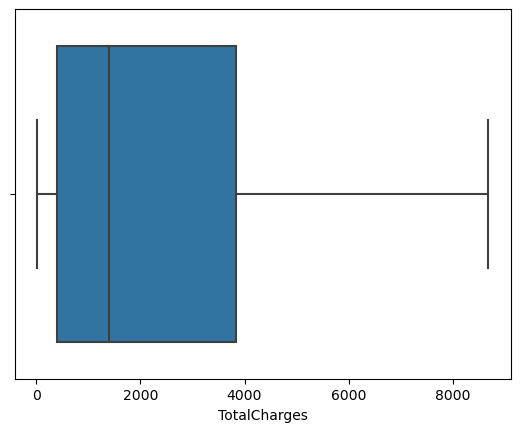

In [112]:
sns.boxplot(x='TotalCharges',data=df)

In [113]:
df['TotalCharges'].describe()

count    5282.000000
mean     2294.184864
std      2283.697366
min        18.850000
25%       396.475000
50%      1387.400000
75%      3841.637500
max      8684.800000
Name: TotalCharges, dtype: float64

In [114]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5282,5282,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,...,5282,5282,5282,5282,5282,5282,5282,5282.000000,5282.000000,5282.000000
unique,5282,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,3704-IEAXF,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,2657,NaN,2749,3713,NaN,4752,2519,2323,2618,...,2305,2585,2076,2077,2907,3132,1772,NaN,NaN,NaN
mean,NaN,NaN,0.162060,NaN,NaN,32.362931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.856626,2294.184864,0.265430
std,NaN,NaN,0.368541,NaN,NaN,24.627623,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.171934,2283.697366,0.441604
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.850000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.450000,396.475000,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.500000,1387.400000,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.987500,3841.637500,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


C:\Users\solan\AppData\Local\Temp\ipykernel_5952\1855628183.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f")


<Axes: >

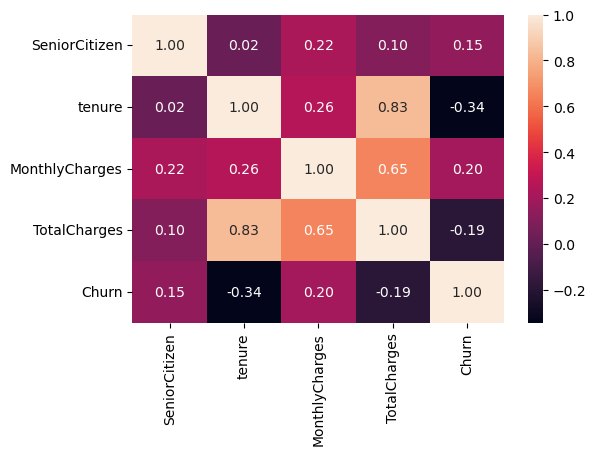

In [116]:
# this is for eda process 
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [117]:
#let's drop customer id so we can find the duplicates
df.drop(['customerID'],axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   object 


In [119]:
#let's see actual duplicate 
#duplicates treating 
dups = df.duplicated()
print(' duplicate batade = %d' % (dups.sum()))

 duplicate batade = 13


In [120]:
#as we see we have 13 duplicates means we need to drop it and further move to our process 
df = df.drop_duplicates()


In [121]:
#we remove 13 duplicate rows ,   before dropping duplicates we have 5282 rows and now we have 5269 so yes code works
df.shape

(5269, 20)

In [122]:
# now we are labeling categorical columns , but first let's label gender column and see if it is working or not 
df['Gender_encoded'] = df['gender'].map({'Male':0,'Female':1})

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5269 non-null   object 
 1   SeniorCitizen     5269 non-null   int64  
 2   Partner           5269 non-null   object 
 3   Dependents        5269 non-null   object 
 4   tenure            5269 non-null   int64  
 5   PhoneService      5269 non-null   object 
 6   MultipleLines     5269 non-null   object 
 7   InternetService   5269 non-null   object 
 8   OnlineSecurity    5269 non-null   object 
 9   OnlineBackup      5269 non-null   object 
 10  DeviceProtection  5269 non-null   object 
 11  TechSupport       5269 non-null   object 
 12  StreamingTV       5269 non-null   object 
 13  StreamingMovies   5269 non-null   object 
 14  Contract          5269 non-null   object 
 15  PaperlessBilling  5269 non-null   object 
 16  PaymentMethod     5269 non-null   object 


In [124]:
#now we are going to apply mutiple labeling formula 

df['Partner'] = df['Partner'].map({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].map({'No':0,'Yes':1})
df['PhoneService'] = df['PhoneService'].map({'No':0,'Yes':1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service':2,'No':0, 'Yes':1})
df['InternetService'] = df['InternetService'].map({'DSL':1,'No':0,'Fiber optic':2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No':0,'No internet service':2, 'Yes':1})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})
df['DeviceProtection']=df['DeviceProtection'].map({'No':0,'No internet service':2,'Yes':1})
df['TechSupport'] = df['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1,'No':0,'No internet service':2})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1,'No':0})
df['Contract'] = df['Contract'].map({'Two year':2,'Month-to-month':0,'One year':1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Credit card (automatic)':3,'Mailed check':0,'Electronic check':1,'Bank transfer (automatic)':2})

In [125]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_encoded
0,Female,0,1,1,72,0,2,1,0,1,...,1,1,1,2,0,3,53.65,3784.00,0,1
1,Female,0,0,0,4,1,0,1,0,0,...,0,0,0,0,1,0,46.00,193.60,1,1
2,Male,0,0,1,56,1,0,0,2,2,...,2,2,2,1,1,0,21.20,1238.65,0,0
3,Male,0,0,0,56,1,1,2,0,1,...,1,0,1,0,1,1,94.45,5124.60,1,0
4,Female,0,0,0,9,1,0,2,0,0,...,0,0,1,0,1,1,79.55,723.40,1,1


In [126]:
columns_to_check = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod']

for col in columns_to_check:
    print(f"{col}: {df[col].unique()}\n")



Partner: [1 0]

Dependents: [1 0]

PhoneService: [0 1]

MultipleLines: [2 0 1]

InternetService: [1 0 2]

OnlineSecurity: [0 2 1]

OnlineBackup: [1 0 2]

DeviceProtection: [0 2 1]

TechSupport: [1 0 2]

StreamingTV: [1 0 2]

StreamingMovies: [1 0 2]

PaperlessBilling: [0 1]

Contract: [2 0 1]

PaymentMethod: [3 0 1 2]



In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5269 non-null   object 
 1   SeniorCitizen     5269 non-null   int64  
 2   Partner           5269 non-null   int64  
 3   Dependents        5269 non-null   int64  
 4   tenure            5269 non-null   int64  
 5   PhoneService      5269 non-null   int64  
 6   MultipleLines     5269 non-null   int64  
 7   InternetService   5269 non-null   int64  
 8   OnlineSecurity    5269 non-null   int64  
 9   OnlineBackup      5269 non-null   int64  
 10  DeviceProtection  5269 non-null   int64  
 11  TechSupport       5269 non-null   int64  
 12  StreamingTV       5269 non-null   int64  
 13  StreamingMovies   5269 non-null   int64  
 14  Contract          5269 non-null   int64  
 15  PaperlessBilling  5269 non-null   int64  
 16  PaymentMethod     5269 non-null   int64  


In [128]:
df.drop(['gender'],axis=1,inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5269 non-null   int64  
 1   Partner           5269 non-null   int64  
 2   Dependents        5269 non-null   int64  
 3   tenure            5269 non-null   int64  
 4   PhoneService      5269 non-null   int64  
 5   MultipleLines     5269 non-null   int64  
 6   InternetService   5269 non-null   int64  
 7   OnlineSecurity    5269 non-null   int64  
 8   OnlineBackup      5269 non-null   int64  
 9   DeviceProtection  5269 non-null   int64  
 10  TechSupport       5269 non-null   int64  
 11  StreamingTV       5269 non-null   int64  
 12  StreamingMovies   5269 non-null   int64  
 13  Contract          5269 non-null   int64  
 14  PaperlessBilling  5269 non-null   int64  
 15  PaymentMethod     5269 non-null   int64  
 16  MonthlyCharges    5269 non-null   float64


In [130]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_encoded
0,0,1,1,72,0,2,1,0,1,0,1,1,1,2,0,3,53.65,3784.00,0,1
1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,46.00,193.60,1,1
2,0,0,1,56,1,0,0,2,2,2,2,2,2,1,1,0,21.20,1238.65,0,0
3,0,0,0,56,1,1,2,0,1,0,1,0,1,0,1,1,94.45,5124.60,1,0
4,0,0,0,9,1,0,2,0,0,0,0,0,1,0,1,1,79.55,723.40,1,1


In [131]:
df = df.rename(columns={'Gender_encoded': 'gender'})


In [132]:
df.head(15)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender
0,0,1,1,72,0,2,1,0,1,0,1,1,1,2,0,3,53.65,3784.00,0,1
1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,46.00,193.60,1,1
2,0,0,1,56,1,0,0,2,2,2,2,2,2,1,1,0,21.20,1238.65,0,0
3,0,0,0,56,1,1,2,0,1,0,1,0,1,0,1,1,94.45,5124.60,1,0
4,0,0,0,9,1,0,2,0,0,0,0,0,1,0,1,1,79.55,723.40,1,1
5,0,1,1,60,1,0,0,2,2,2,2,2,2,2,1,3,19.25,1103.25,0,1
6,0,1,0,59,1,1,2,1,1,1,1,0,1,1,1,3,107.00,6152.30,0,1
7,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,49.85,49.85,0,0
8,0,0,1,1,1,1,0,2,2,2,2,2,2,0,0,0,25.40,25.40,0,1
9,0,0,0,66,1,1,0,2,2,2,2,2,2,2,1,3,25.15,1683.60,0,1


In [133]:

from sklearn.preprocessing import StandardScaler

# Extracting the columns
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
sub_df = df[columns_to_scale]

# Apply z-score scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sub_df)

# Store the scaled data in a new DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)


In [134]:
df[columns_to_scale] = scaled_df


In [135]:
df.head(20)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender
0,0,1,1,1.607708,0,2,1,0,1,0,1,1,1,2,0,3,-0.373662,0.649977,0,1
1,0,0,0,-1.155816,1,0,1,0,0,0,0,0,0,0,1,0,-0.627311,-0.922315,1,1
2,0,0,1,0.957467,1,0,0,2,2,2,2,2,2,1,1,0,-1.449599,-0.464672,0,0
3,0,0,0,0.957467,1,1,2,0,1,0,1,0,1,0,1,1,0.979134,1.237047,1,0
4,0,0,0,-0.952616,1,0,2,0,0,0,0,0,1,0,1,1,0.485098,-0.690308,1,1
5,0,1,1,1.120027,1,0,0,2,2,2,2,2,2,2,1,3,-1.514255,-0.523965,0,1
6,0,1,0,1.079387,1,1,2,1,1,1,1,0,1,1,1,3,1.395251,1.687093,0,1
7,0,0,1,-1.277736,1,0,1,0,0,1,0,0,0,0,1,1,-0.499658,-0.985266,0,0
8,0,0,1,-1.277736,1,1,0,2,2,2,2,2,2,0,0,0,-1.310341,-0.995973,0,1
9,0,0,0,1.363868,1,1,0,2,2,2,2,2,2,2,1,3,-1.318630,-0.269821,0,1


In [136]:
#need to clear null values 
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure              13
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      13
TotalCharges        13
Churn                0
gender               0
dtype: int64

In [137]:
#df['tenure']=df['tenure'].replace(np.nan,df['tenure'].median())
#df['MonthlyCharges']=df['MonthlyCharges'].replace(np.nan,df['MonthlyCharges'].median())
#df['TotalCharges']=df['TotalCharges'].replace(np.nan,df['TotalCharges'].median())
     #we can use the above code but we will use loop function 
    
columns_to_replace = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in columns_to_replace:
    df[col] = df[col].replace(np.nan, df[col].median())
   

In [138]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
dtype: int64

In [139]:
# with help of this code we will predict , training & testing 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Splitting data into training and test sets
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Creating a Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions_test = model.predict(X_test)

# Making predictions
predictions_train = model.predict(X_train)

# Printing the classification report
print(classification_report(y_test, predictions_test))



              precision    recall  f1-score   support

           0       0.84      0.88      0.86       775
           1       0.61      0.52      0.56       279

    accuracy                           0.78      1054
   macro avg       0.72      0.70      0.71      1054
weighted avg       0.78      0.78      0.78      1054



In [140]:
# Printing the classification reports
print("Classification Report for Test Data:")
print(classification_report(y_test, predictions_test))

print("\nClassification Report for Training Data:")
print(classification_report(y_train, predictions_train))

# Printing the confusion matrices
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, predictions_test))

print("\nConfusion Matrix for Training Data:")
print(confusion_matrix(y_train, predictions_train))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       775
           1       0.61      0.52      0.56       279

    accuracy                           0.78      1054
   macro avg       0.72      0.70      0.71      1054
weighted avg       0.78      0.78      0.78      1054


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      3101
           1       0.64      0.51      0.57      1114

    accuracy                           0.79      4215
   macro avg       0.74      0.70      0.71      4215
weighted avg       0.78      0.79      0.79      4215

Confusion Matrix for Test Data:
[[682  93]
 [134 145]]

Confusion Matrix for Training Data:
[[2776  325]
 [ 547  567]]


                                  THIS IS RANDOM-FOREST CLASSIFIER 

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, #trees are 100
                                  max_features='sqrt',#we have 19 columns so split will be for 4 columns max
                                  max_depth=15,  # A moderate depth to ensure the tree doesn't grow very deep
                                  min_samples_split=50,  # Starting with a moderately large split size considering the dataset size
                                  min_samples_leaf=25,  # This will ensure we have a decent number of samples in each leaf
                                  random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
predictions_train = rf_model.predict(X_train)
predictions_test = rf_model.predict(X_test)

# Printing the classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, predictions_train))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, predictions_test))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3101
           1       0.72      0.49      0.58      1114

    accuracy                           0.82      4215
   macro avg       0.78      0.71      0.73      4215
weighted avg       0.81      0.82      0.80      4215


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       775
           1       0.65      0.44      0.53       279

    accuracy                           0.79      1054
   macro avg       0.73      0.68      0.70      1054
weighted avg       0.77      0.79      0.77      1054



In [142]:
dfa = pd.read_csv('active_customers.csv')

In [143]:
dfa.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5343-SGUBI,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Mailed check,80.20,4297.6
1,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5
2,6434-TTGJP,Male,0,Yes,Yes,10,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),53.70,521
3,1628-BIZYP,Male,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
4,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554


In [144]:
dfa.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [145]:
dfa.shape

(1761, 20)

In [146]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [147]:
# List of columns with data type 'object'
object_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

for col in object_columns:
    print(f"Value counts for {col}:")
    print(dfa[col].value_counts())
    print("----------------------")

Value counts for gender:
Male      898
Female    863
Name: gender, dtype: int64
----------------------
Value counts for Partner:
No     892
Yes    869
Name: Partner, dtype: int64
----------------------
Value counts for Dependents:
No     1220
Yes     541
Name: Dependents, dtype: int64
----------------------
Value counts for PhoneService:
Yes    1609
No      152
Name: PhoneService, dtype: int64
----------------------
Value counts for MultipleLines:
No                  871
Yes                 738
No phone service    152
Name: MultipleLines, dtype: int64
----------------------
Value counts for InternetService:
Fiber optic    773
DSL            605
No             383
Name: InternetService, dtype: int64
----------------------
Value counts for OnlineSecurity:
No                     880
Yes                    498
No internet service    383
Name: OnlineSecurity, dtype: int64
----------------------
Value counts for OnlineBackup:
No                     788
Yes                    590
No internet 

In [148]:
# as we already see that total charge data dype is object so something is wrong with this column
# let's find out and solve this problem 


print(sorted(dfa['TotalCharges'].unique()))

[' ', '1004.35', '1008.7', '101.1', '1011.05', '1013.2', '1016.7', '1017.35', '102.45', '1020.2', '1021.75', '1022.6', '1022.95', '1025.15', '1028.75', '1029.35', '103.7', '1032.05', '1033.95', '1036.75', '1042.65', '1043.3', '1043.4', '1048.85', '1049.6', '105.6', '1050.5', '1051.9', '1052.4', '1057', '106.9', '1060.6', '1064.95', '107.05', '107.1', '1070.15', '1070.25', '1071.6', '1074.65', '1077.5', '1077.95', '108.65', '108.95', '1080.55', '1082.8', '1083.7', '1090.1', '1090.6', '1092.35', '1093', '1093.2', '1108.2', '1108.8', '112.3', '1122.4', '1123.15', '1123.65', '1124.2', '1128.1', '113.5', '113.55', '1130.85', '1131.2', '1132.35', '1138.8', '1143.8', '1147.45', '115.1', '1153.25', '1156.1', '1156.55', '116.65', '1165.55', '1169.35', '1171.5', '1173.35', '1173.55', '1177.95', '1178.25', '1178.75', '118.25', '118.5', '1183.05', '1183.2', '1185.95', '1188.25', '1189.4', '119.3', '1191.4', '1192.3', '1192.7', '1194.3', '1195.25', '1199.4', '1205.05', '1208.6', '1215.6', '1216.6',

In [149]:
# we have problem in this column that's why we can not change the type of the column,  
# Step 1: Replace spaces with NaN
dfa['TotalCharges'].replace(' ', np.nan, inplace=True)

# Step 2: Convert to float
dfa['TotalCharges'] = dfa['TotalCharges'].astype('float64')

In [150]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [151]:
dfa.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [152]:
#as we see we have null values so wee need to replace this with median 

dfa['TotalCharges'] = dfa['TotalCharges'].replace(np.nan, df['TotalCharges'].median())

In [153]:
dfa.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [154]:
#now everything is going good , no null values 

<Axes: xlabel='TotalCharges'>

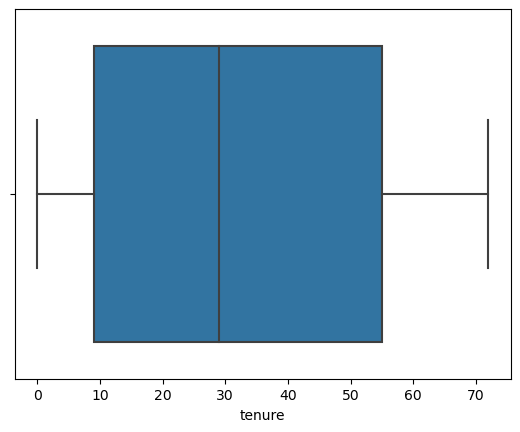

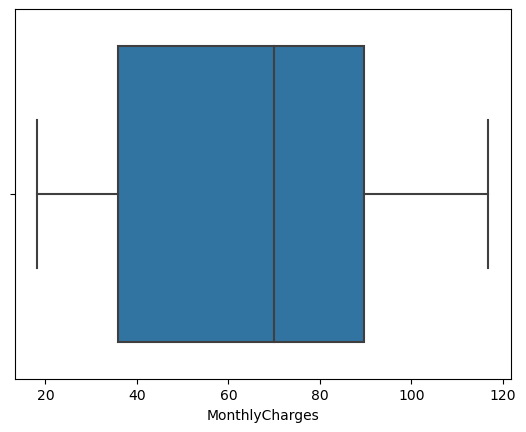

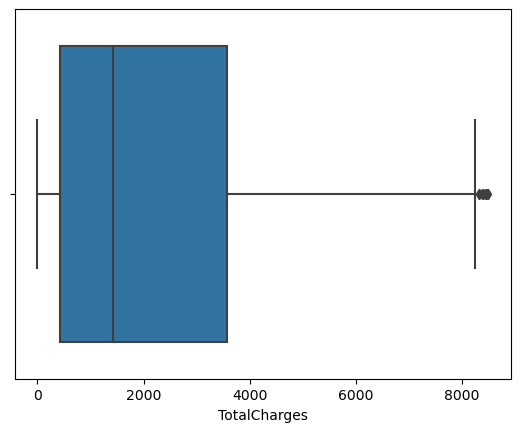

In [155]:
plt.figure()
sns.boxplot(x='tenure',data=dfa)

plt.figure()
sns.boxplot(x='MonthlyCharges',data=dfa)

plt.figure()
sns.boxplot(x='TotalCharges',data=dfa)

In [156]:
# calculate iqr,q1,q3 
q1 = dfa['TotalCharges'].quantile(0.25)
q3 = dfa['TotalCharges'].quantile(0.75)
iqr = q3 - q1
#define bound
lb = q1 - 1.5* iqr
up = q3 + 1.5* iqr
#solve the problem
dfa['TotalCharges']= np.where(dfa['TotalCharges']<lb,lb,dfa['TotalCharges'])
dfa['TotalCharges']= np.where(dfa['TotalCharges']>up,up,dfa['TotalCharges'])

<Axes: xlabel='TotalCharges'>

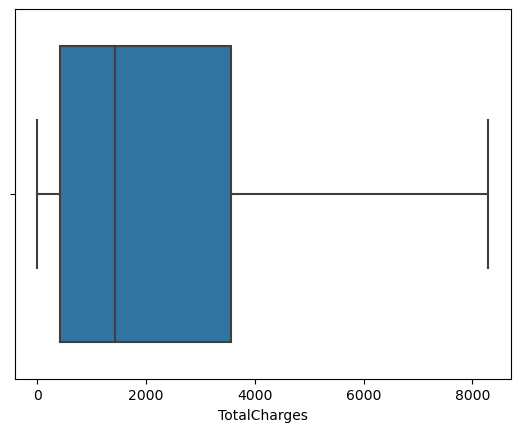

In [157]:
sns.boxplot(x='TotalCharges',data=dfa)

In [158]:
#let's see actual duplicate 
#duplicates treating 
dupli = dfa.duplicated()
print(' duplicate batade = %d' % (dupli.sum()))

 duplicate batade = 0


In [159]:
rish = dfa.duplicated()
print(rish.sum())

0


In [160]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [161]:
#let's drop customer_id cause no need of that column
dfa.drop(['customerID'],axis=1,inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5269 non-null   int64  
 1   Partner           5269 non-null   int64  
 2   Dependents        5269 non-null   int64  
 3   tenure            5269 non-null   float64
 4   PhoneService      5269 non-null   int64  
 5   MultipleLines     5269 non-null   int64  
 6   InternetService   5269 non-null   int64  
 7   OnlineSecurity    5269 non-null   int64  
 8   OnlineBackup      5269 non-null   int64  
 9   DeviceProtection  5269 non-null   int64  
 10  TechSupport       5269 non-null   int64  
 11  StreamingTV       5269 non-null   int64  
 12  StreamingMovies   5269 non-null   int64  
 13  Contract          5269 non-null   int64  
 14  PaperlessBilling  5269 non-null   int64  
 15  PaymentMethod     5269 non-null   int64  
 16  MonthlyCharges    5269 non-null   float64


In [163]:
#let's do labeling means categorical into numerical 
for col in dfa.columns:
    if dfa[col].dtype == 'object':
        dfa[col] = dfa[col].astype('category')
        dfa[f'{col}_code'] = dfa[col].cat.codes


In [164]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 1761 non-null   category
 1   SeniorCitizen          1761 non-null   int64   
 2   Partner                1761 non-null   category
 3   Dependents             1761 non-null   category
 4   tenure                 1761 non-null   int64   
 5   PhoneService           1761 non-null   category
 6   MultipleLines          1761 non-null   category
 7   InternetService        1761 non-null   category
 8   OnlineSecurity         1761 non-null   category
 9   OnlineBackup           1761 non-null   category
 10  DeviceProtection       1761 non-null   category
 11  TechSupport            1761 non-null   category
 12  StreamingTV            1761 non-null   category
 13  StreamingMovies        1761 non-null   category
 14  Contract               1761 non-null   c

In [165]:
# let's check the unique values, how python label our categorical colmuns 
for col in dfa.columns:
    if "_code" in col:
        original_col = col.replace('_code', '')
        mapping = dict(enumerate(dfa[original_col].cat.categories))
        print(f"Mapping for {original_col}: ", mapping)



Mapping for gender:  {0: 'Female', 1: 'Male'}
Mapping for Partner:  {0: 'No', 1: 'Yes'}
Mapping for Dependents:  {0: 'No', 1: 'Yes'}
Mapping for PhoneService:  {0: 'No', 1: 'Yes'}
Mapping for MultipleLines:  {0: 'No', 1: 'No phone service', 2: 'Yes'}
Mapping for InternetService:  {0: 'DSL', 1: 'Fiber optic', 2: 'No'}
Mapping for OnlineSecurity:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for OnlineBackup:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for DeviceProtection:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for TechSupport:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for StreamingTV:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for StreamingMovies:  {0: 'No', 1: 'No internet service', 2: 'Yes'}
Mapping for Contract:  {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
Mapping for PaperlessBilling:  {0: 'No', 1: 'Yes'}
Mapping for PaymentMethod:  {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic chec

In [166]:
cols_to_drop = []

for col in dfa.columns:
    if dfa[col].dtype.name == 'category':
        cols_to_drop.append(col)

dfa.drop(columns=cols_to_drop, inplace=True)

    

In [167]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          1761 non-null   int64  
 1   tenure                 1761 non-null   int64  
 2   MonthlyCharges         1761 non-null   float64
 3   TotalCharges           1761 non-null   float64
 4   gender_code            1761 non-null   int8   
 5   Partner_code           1761 non-null   int8   
 6   Dependents_code        1761 non-null   int8   
 7   PhoneService_code      1761 non-null   int8   
 8   MultipleLines_code     1761 non-null   int8   
 9   InternetService_code   1761 non-null   int8   
 10  OnlineSecurity_code    1761 non-null   int8   
 11  OnlineBackup_code      1761 non-null   int8   
 12  DeviceProtection_code  1761 non-null   int8   
 13  TechSupport_code       1761 non-null   int8   
 14  StreamingTV_code       1761 non-null   int8   
 15  Stre

In [168]:
dfa.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_code,Partner_code,Dependents_code,PhoneService_code,MultipleLines_code,InternetService_code,OnlineSecurity_code,OnlineBackup_code,DeviceProtection_code,TechSupport_code,StreamingTV_code,StreamingMovies_code,Contract_code,PaperlessBilling_code,PaymentMethod_code
0,0,52,80.20,4297.6,0,0,0,1,2,1,0,2,0,0,0,0,1,1,3
1,0,33,24.25,838.5,0,1,1,1,2,2,1,1,1,1,1,1,0,0,0
2,0,10,53.70,521.0,1,1,1,0,1,0,2,2,2,2,0,2,2,0,1
3,0,1,85.00,85.0,1,0,0,1,0,1,0,2,0,0,0,2,0,1,2
4,0,52,50.20,2554.0,1,1,1,0,1,0,0,2,2,2,2,0,2,0,3


In [169]:
#let's use z-socre on our numerical column tenure,total,monthly charges 
# Extracting the columns
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply z-score scaling
scaler = StandardScaler()
dfa[columns_to_scale] = scaler.fit_transform(dfa[columns_to_scale])



In [170]:
dfa.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_code,Partner_code,Dependents_code,PhoneService_code,MultipleLines_code,InternetService_code,OnlineSecurity_code,OnlineBackup_code,DeviceProtection_code,TechSupport_code,StreamingTV_code,StreamingMovies_code,Contract_code,PaperlessBilling_code,PaymentMethod_code
0,0,0.804969,0.526889,0.930507,0,0,0,1,2,1,0,2,0,0,0,0,1,1,3
1,0,0.024809,-1.348028,-0.635455,0,1,1,1,2,2,1,1,1,1,1,1,0,0,0
2,0,-0.919595,-0.361142,-0.779190,1,1,1,0,1,0,2,2,2,2,0,2,2,0,1
3,0,-1.289145,0.687739,-0.976571,1,0,0,1,0,1,0,2,0,0,0,2,0,1,2
4,0,0.804969,-0.478429,0.141165,1,1,1,0,1,0,0,2,2,2,2,0,2,0,3


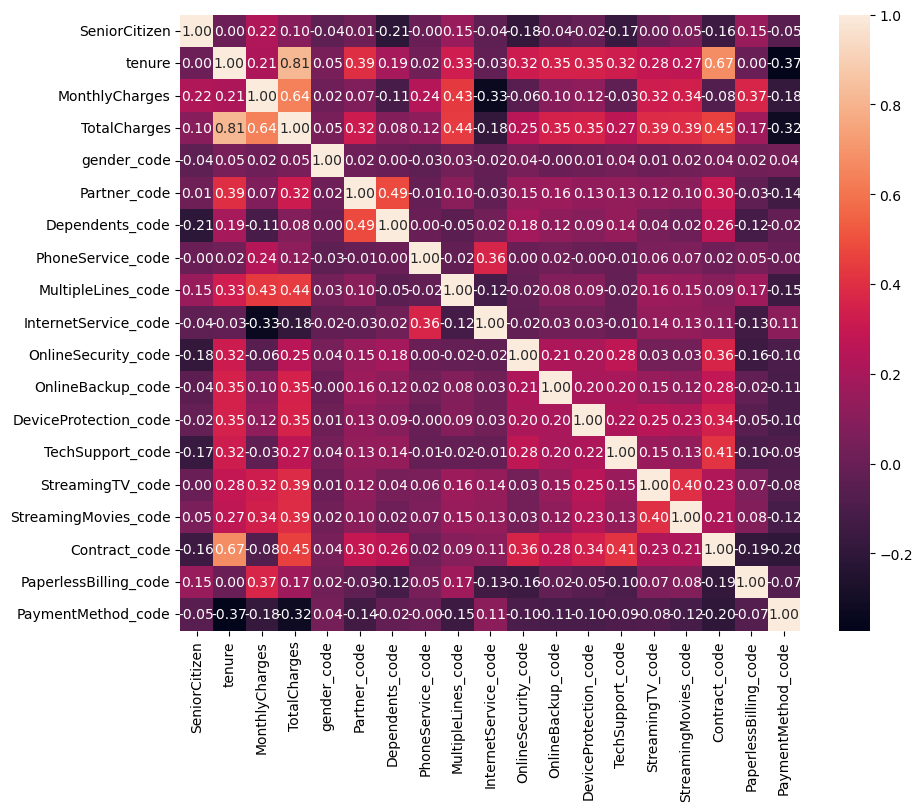

In [171]:
#let's check connection between different columns with the hepl of heatmap
plt.figure(figsize=(10,8))
sns.heatmap(dfa.corr(), annot=True, fmt=".2f")
plt.show()


In [172]:
# our model wil not work if the x_train column names&order is not matching in active(dfa) data set so we will solve this problem 
rename_dict = {
    'gender_code': 'gender',
    'Partner_code': 'Partner',
    'Dependents_code': 'Dependents',
    'PhoneService_code': 'PhoneService',
    'MultipleLines_code': 'MultipleLines',
    'InternetService_code': 'InternetService',
    'OnlineSecurity_code': 'OnlineSecurity',
    'OnlineBackup_code': 'OnlineBackup',
    'DeviceProtection_code': 'DeviceProtection',
    'TechSupport_code': 'TechSupport',
    'StreamingTV_code': 'StreamingTV',
    'StreamingMovies_code': 'StreamingMovies',
    'Contract_code': 'Contract',
    'PaperlessBilling_code': 'PaperlessBilling',
    'PaymentMethod_code': 'PaymentMethod'
}
dfa.rename(columns=rename_dict, inplace=True)

In [173]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     1761 non-null   int64  
 1   tenure            1761 non-null   float64
 2   MonthlyCharges    1761 non-null   float64
 3   TotalCharges      1761 non-null   float64
 4   gender            1761 non-null   int8   
 5   Partner           1761 non-null   int8   
 6   Dependents        1761 non-null   int8   
 7   PhoneService      1761 non-null   int8   
 8   MultipleLines     1761 non-null   int8   
 9   InternetService   1761 non-null   int8   
 10  OnlineSecurity    1761 non-null   int8   
 11  OnlineBackup      1761 non-null   int8   
 12  DeviceProtection  1761 non-null   int8   
 13  TechSupport       1761 non-null   int8   
 14  StreamingTV       1761 non-null   int8   
 15  StreamingMovies   1761 non-null   int8   
 16  Contract          1761 non-null   int8   


In [174]:
# Note: 'Churn' will not be present in dfa, so we drop it from the column order of df and give it order just like df (train set)
column_order = [col for col in df.columns if col != 'Churn']
dfa = dfa[column_order]

In [175]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     1761 non-null   int64  
 1   Partner           1761 non-null   int8   
 2   Dependents        1761 non-null   int8   
 3   tenure            1761 non-null   float64
 4   PhoneService      1761 non-null   int8   
 5   MultipleLines     1761 non-null   int8   
 6   InternetService   1761 non-null   int8   
 7   OnlineSecurity    1761 non-null   int8   
 8   OnlineBackup      1761 non-null   int8   
 9   DeviceProtection  1761 non-null   int8   
 10  TechSupport       1761 non-null   int8   
 11  StreamingTV       1761 non-null   int8   
 12  StreamingMovies   1761 non-null   int8   
 13  Contract          1761 non-null   int8   
 14  PaperlessBilling  1761 non-null   int8   
 15  PaymentMethod     1761 non-null   int8   
 16  MonthlyCharges    1761 non-null   float64


                              THIS IS ON ACTIVE_CUSTOMER DATA SET   [LOGISTIC REGRESSION]

In [176]:
# now we can try prediction  logisticregression 
prediction_active = model.predict(dfa)
for index, prediction in enumerate(prediction_active, 1):  # starting index from 1
    print(f"Row {index}: Prediction = {prediction}")


Row 1: Prediction = 0
Row 2: Prediction = 0
Row 3: Prediction = 0
Row 4: Prediction = 0
Row 5: Prediction = 0
Row 6: Prediction = 1
Row 7: Prediction = 0
Row 8: Prediction = 0
Row 9: Prediction = 0
Row 10: Prediction = 0
Row 11: Prediction = 1
Row 12: Prediction = 0
Row 13: Prediction = 1
Row 14: Prediction = 0
Row 15: Prediction = 0
Row 16: Prediction = 0
Row 17: Prediction = 0
Row 18: Prediction = 1
Row 19: Prediction = 0
Row 20: Prediction = 1
Row 21: Prediction = 0
Row 22: Prediction = 0
Row 23: Prediction = 0
Row 24: Prediction = 0
Row 25: Prediction = 0
Row 26: Prediction = 0
Row 27: Prediction = 0
Row 28: Prediction = 0
Row 29: Prediction = 0
Row 30: Prediction = 1
Row 31: Prediction = 1
Row 32: Prediction = 0
Row 33: Prediction = 1
Row 34: Prediction = 0
Row 35: Prediction = 0
Row 36: Prediction = 0
Row 37: Prediction = 0
Row 38: Prediction = 1
Row 39: Prediction = 0
Row 40: Prediction = 0
Row 41: Prediction = 0
Row 42: Prediction = 0
Row 43: Prediction = 0
Row 44: Prediction =

In [ ]:
                                  THIS IS FOR ACTIVE CUSTOMER DATASET (RANDOM FOREST) 

In [178]:
# Making predictions with the trained random forest model on dfa
prediction_active_rfc = rf_model.predict(dfa)

# Printing the predictions for each row
for index, prediction in enumerate(prediction_active_rfc, 1):  # starting index from 1
    print(f"Row {index}: Prediction = {prediction}")



Row 1: Prediction = 0
Row 2: Prediction = 0
Row 3: Prediction = 0
Row 4: Prediction = 0
Row 5: Prediction = 0
Row 6: Prediction = 0
Row 7: Prediction = 0
Row 8: Prediction = 0
Row 9: Prediction = 0
Row 10: Prediction = 0
Row 11: Prediction = 0
Row 12: Prediction = 0
Row 13: Prediction = 0
Row 14: Prediction = 0
Row 15: Prediction = 0
Row 16: Prediction = 0
Row 17: Prediction = 0
Row 18: Prediction = 0
Row 19: Prediction = 0
Row 20: Prediction = 0
Row 21: Prediction = 0
Row 22: Prediction = 0
Row 23: Prediction = 0
Row 24: Prediction = 0
Row 25: Prediction = 0
Row 26: Prediction = 0
Row 27: Prediction = 0
Row 28: Prediction = 0
Row 29: Prediction = 0
Row 30: Prediction = 0
Row 31: Prediction = 0
Row 32: Prediction = 0
Row 33: Prediction = 0
Row 34: Prediction = 0
Row 35: Prediction = 0
Row 36: Prediction = 0
Row 37: Prediction = 0
Row 38: Prediction = 0
Row 39: Prediction = 0
Row 40: Prediction = 0
Row 41: Prediction = 0
Row 42: Prediction = 0
Row 43: Prediction = 0
Row 44: Prediction =